# instructions

## 1. create external table

i use cloud shell

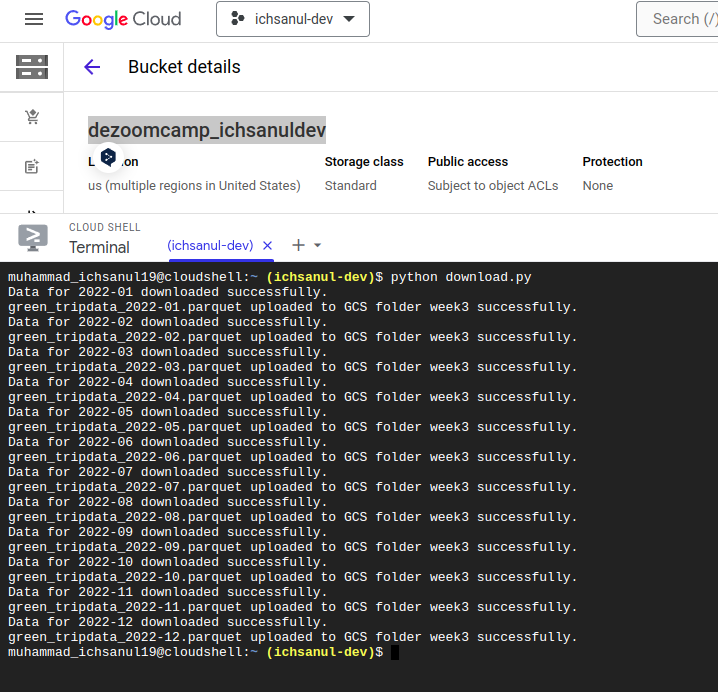

here's the script

In [ ]:
import requests
from google.cloud import storage

# Function to download the data
def download_data(month):
    url = f"https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_2022-{month}.parquet"
    filename = f"green_tripdata_2022-{month}.parquet"
    response = requests.get(url)
    with open(filename, 'wb') as f:
        f.write(response.content)
    print(f"Data for 2022-{month} downloaded successfully.")

# Function to upload data to Google Cloud Storage
def upload_to_gcs(filename, folder):
    storage_client = storage.Client()
    bucket_name = 'dezoomcamp_ichsanuldev'
    bucket = storage_client.bucket(bucket_name)
    blob = bucket.blob(f"{folder}/{filename}")
    blob.upload_from_filename(filename)
    print(f"{filename} uploaded to GCS folder {folder} successfully.")

if __name__ == "__main__":
    # Specify the folder path within the bucket
    folder_path = 'week3'

    # Loop to download data for each month and upload to GCS
    for month in range(1, 13):
        month_str = str(month).zfill(2)  # Pad month number with zero if needed
        download_data(month_str)
        upload_to_gcs(f"green_tripdata_2022-{month_str}.parquet", folder_path)

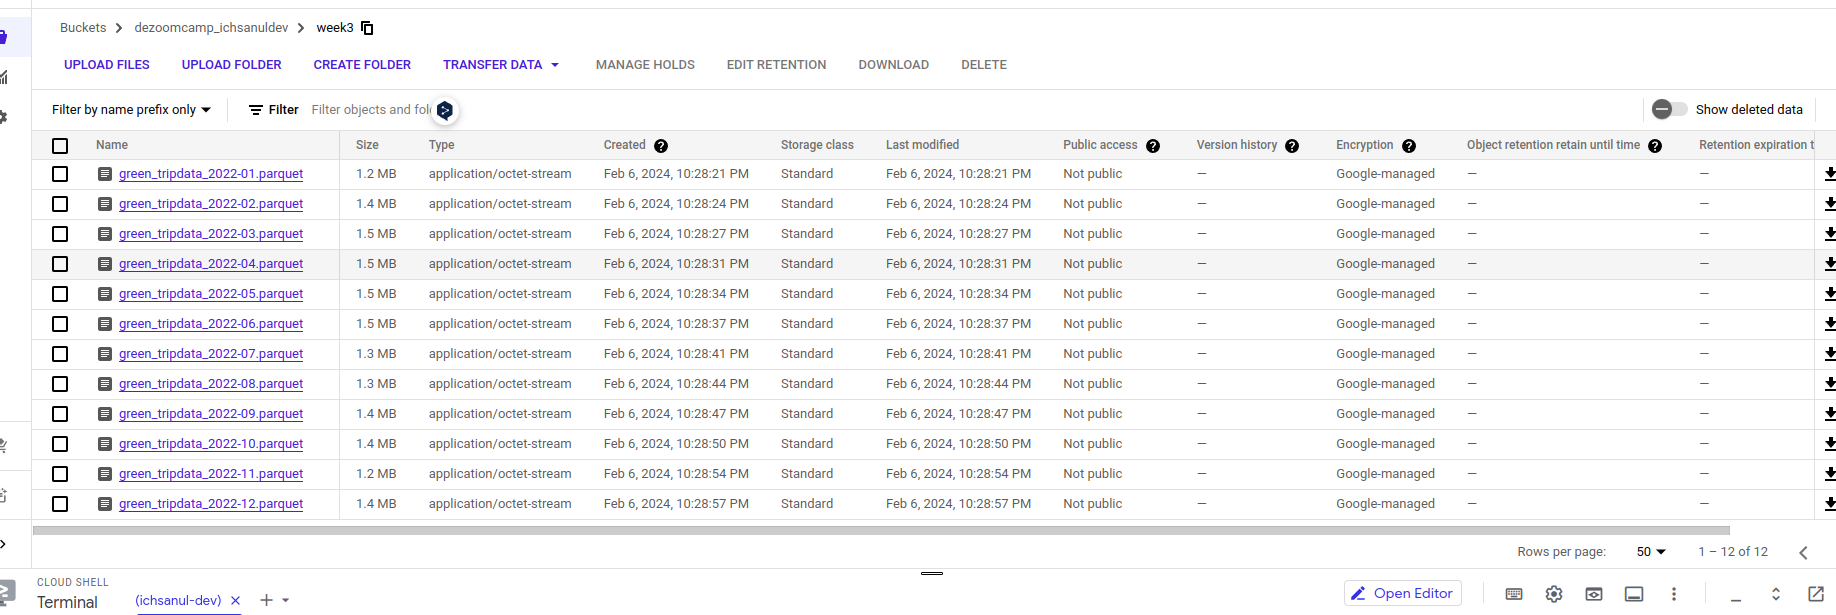

## 2. create native table

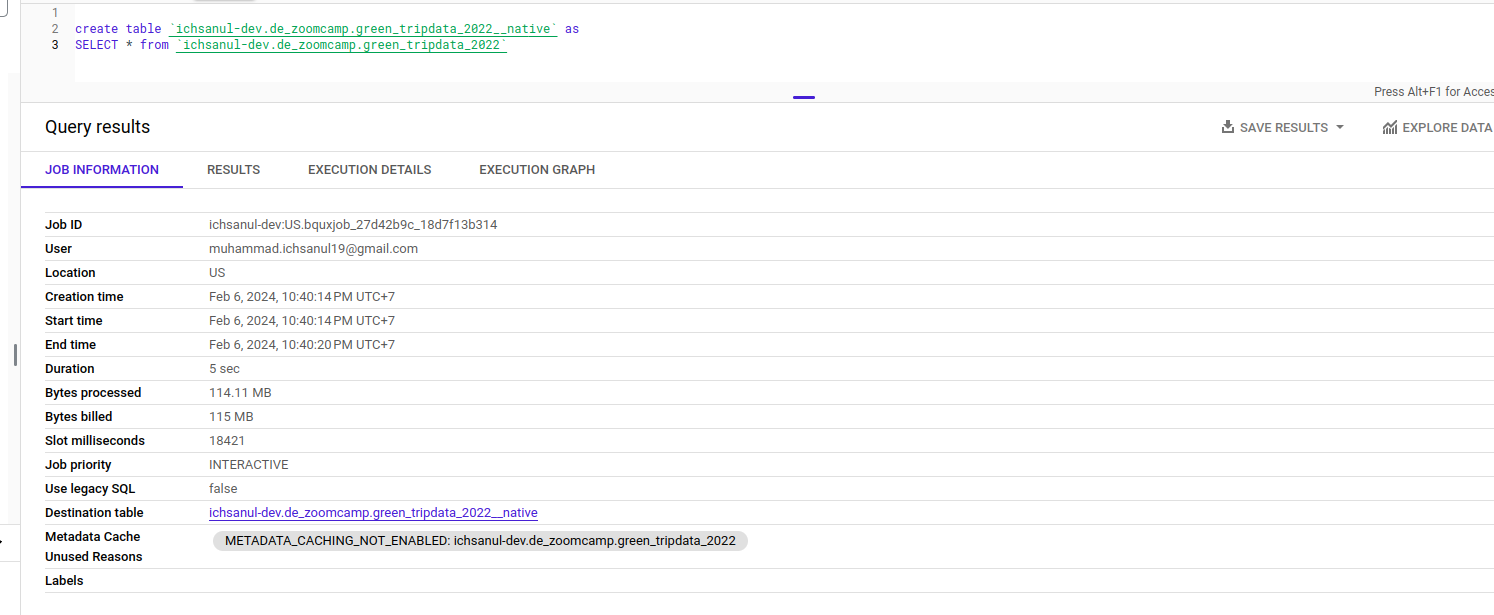

# Q1

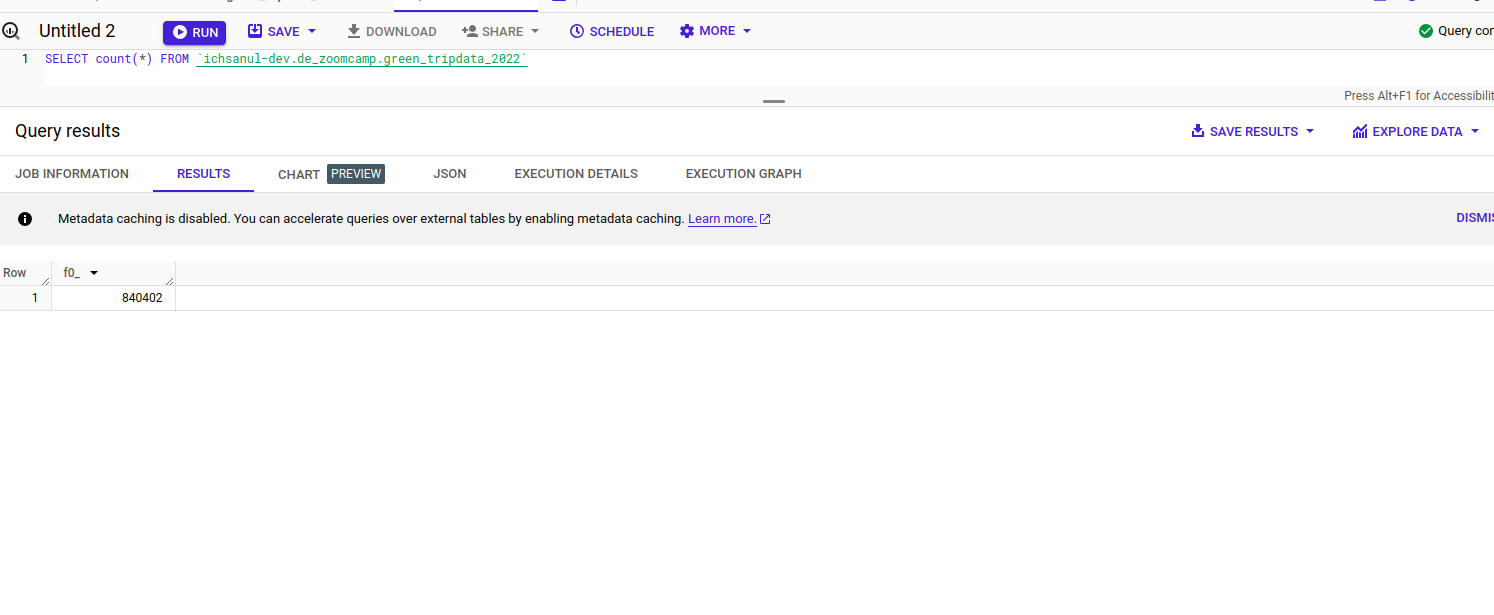

# Q2

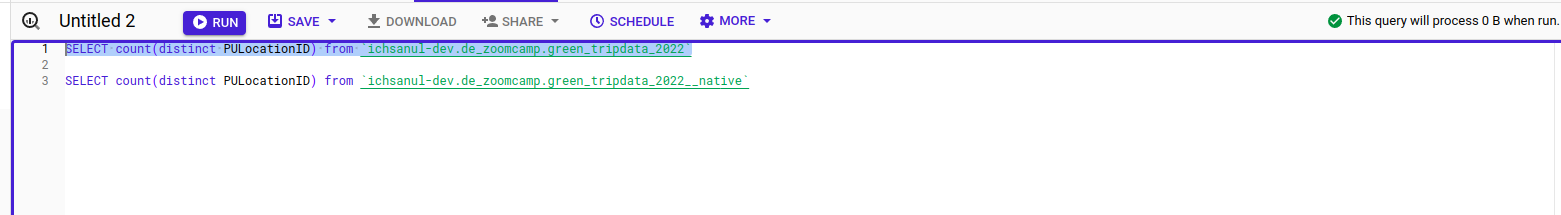

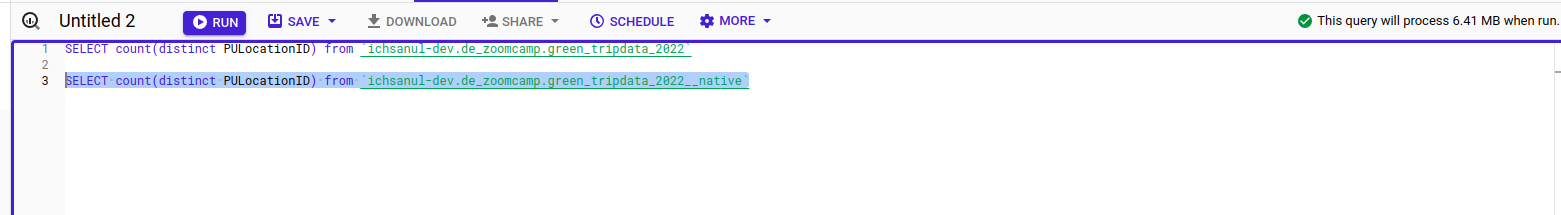

# Q3

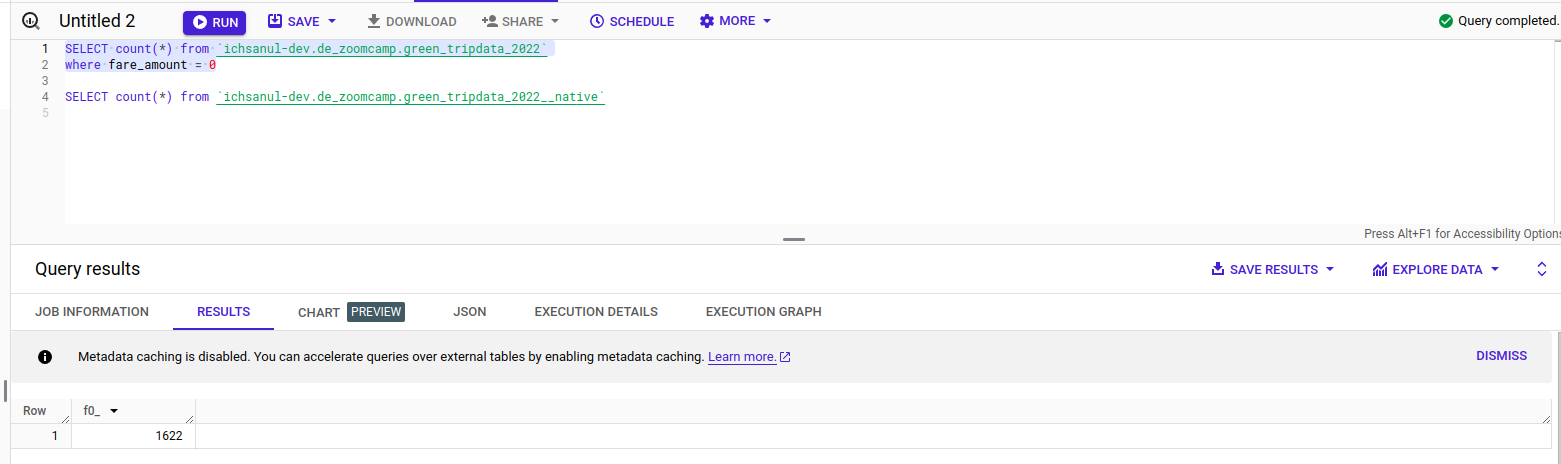

# Q4

Partition by lpep_pickup_datetime, and Cluster on PUlocationID

# Q5

```sql
CREATE or replace TABLE `ichsanul-dev.de_zoomcamp.green_tripdata_2022__partitioned` 
PARTITION BY date(lpep_pickup_datetime) 
CLUSTER BY PUlocationID OPTIONS( partition_expiration_days=2190)
AS select * from `ichsanul-dev.de_zoomcamp.green_tripdata_2022__native`
```

non partitioned

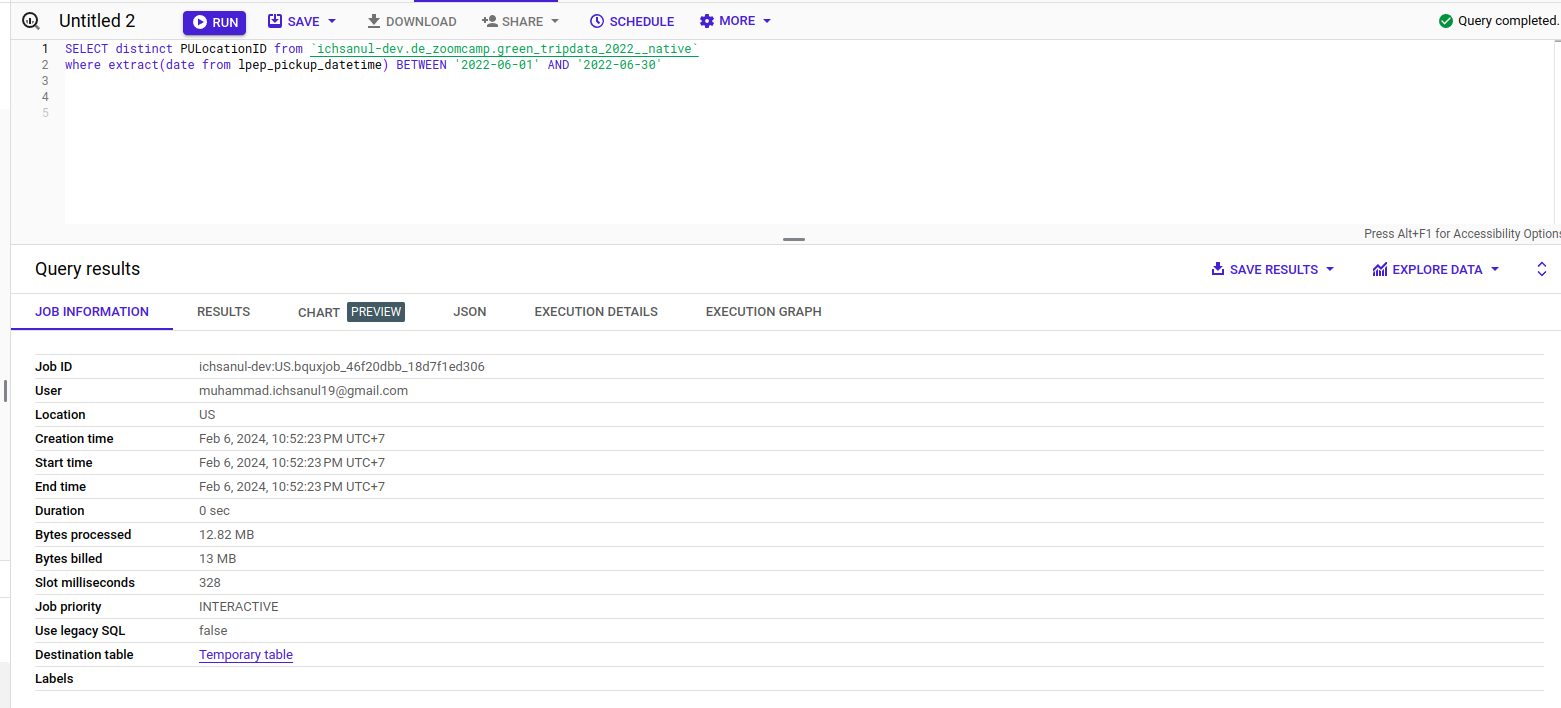

partitioned

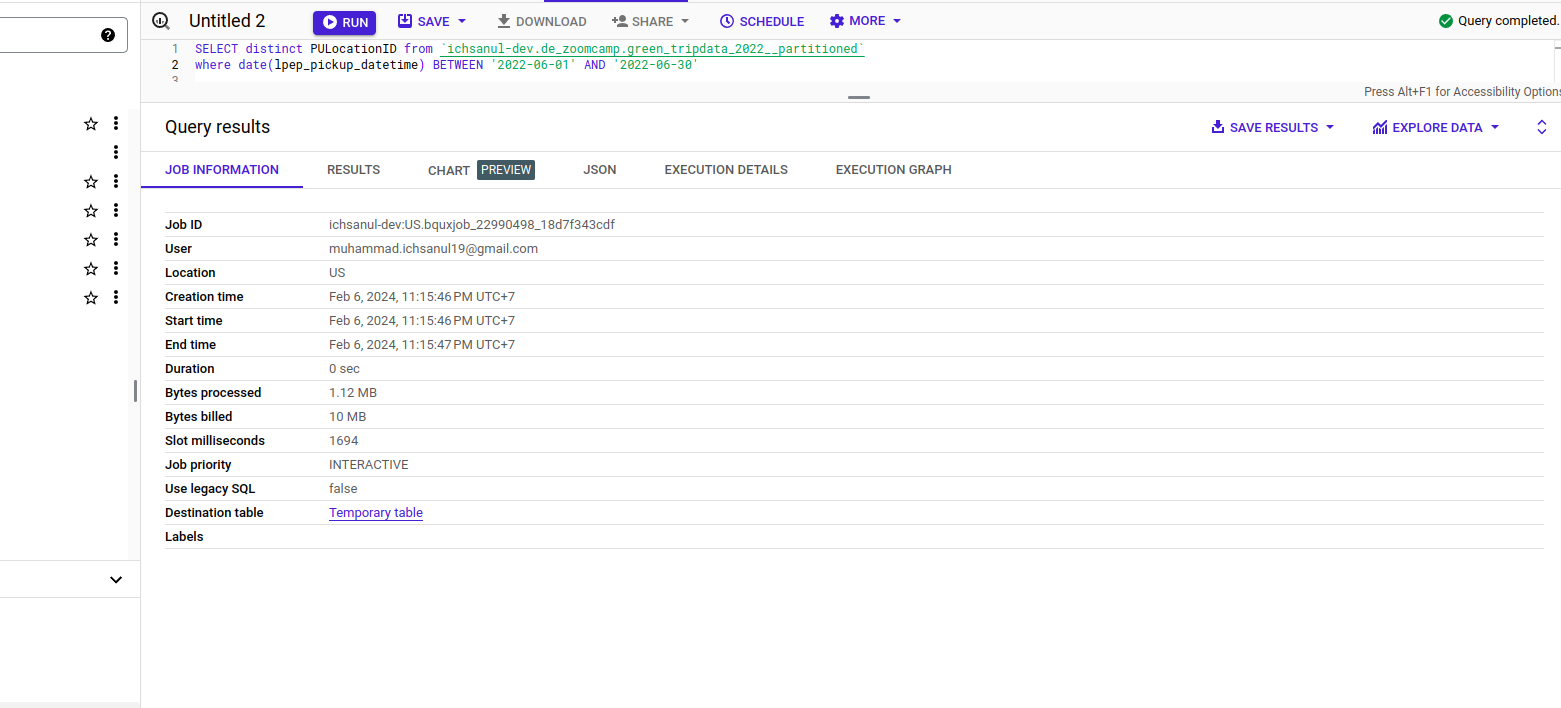




# Q6

GCP Bucket

---

In Google BigQuery, external tables are virtual representations of data stored outside of BigQuery, such as in Google Cloud Storage (GCS), Google Drive, or other supported external data sources. 

When you create an external table in BigQuery, you specify the location of the data in the external storage system. BigQuery does not actually store the data itself but rather retrieves it from the specified external location when queries are executed.

Therefore, the data for an external table in BigQuery is stored in the external storage system that you designated when you created the table. For example, if you created an external table pointing to data in Google Cloud Storage, the data resides in the specified GCS bucket. If the external table is based on data in Google Drive, it's stored in the specified Google Drive folder.

BigQuery retrieves and processes the data from these external locations on-the-fly when queries are run against the external table. This setup allows for querying and analyzing data without needing to load it into BigQuery's native storage, providing flexibility and cost efficiency, especially for large datasets stored externally.

# Q7

False

---

In Google BigQuery, clustering your data can indeed be a best practice in many scenarios, especially when dealing with large datasets. Clustering involves organizing your data based on one or more columns to improve query performance and reduce costs by minimizing the amount of data processed during query execution.

Here are some reasons why clustering your data can be considered a best practice in BigQuery:

1. **Improved Query Performance**: Clustering allows BigQuery to narrow down the subset of data that needs to be scanned when executing queries. By organizing data based on specific columns, BigQuery can skip over irrelevant data partitions, resulting in faster query response times.

2. **Cost Reduction**: Since clustering reduces the amount of data scanned during query execution, it can lead to cost savings, especially for large datasets. By minimizing the volume of data processed, you can lower your query costs in BigQuery.

3. **Optimized Join Performance**: Clustering can significantly improve the performance of joins, especially when joining tables on clustered columns. When data is clustered, BigQuery can leverage the clustered layout to perform more efficient join operations.

4. **Better Partition Pruning**: Clustering can complement partitioning strategies in BigQuery. By clustering your data within partitions, you can further optimize query performance by leveraging both partition pruning and cluster pruning techniques.

5. **Enhanced Data Organization**: Clustering helps organize your data logically based on business requirements or access patterns. It can improve data management and make it easier to navigate and analyze datasets.

However, it's important to note that clustering may not be necessary or beneficial for all datasets or query patterns. It's crucial to assess your specific use case, data access patterns, and query requirements before deciding to cluster your data in BigQuery. Additionally, clustering incurs some overhead during data ingestion and maintenance, so you should consider the trade-offs and performance implications based on your workload characteristics.

In summary, while clustering can be a valuable optimization technique in BigQuery, it's essential to evaluate its benefits against your specific requirements and workload characteristics to determine whether it aligns with your overall data processing and performance objectives.